In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

print("✓ All libraries imported successfully!")
print("✓ pandas version:", pd.__version__)
print("✓ numpy version:", np.__version__)

✓ All libraries imported successfully!
✓ pandas version: 2.2.3
✓ numpy version: 2.1.3


In [4]:
# Download the wine quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Load it directly into pandas
df = pd.read_csv(url, sep=';')

print("✓ Dataset loaded successfully!")
print(f"✓ Shape: {df.shape[0]} rows and {df.shape[1]} columns")
print("\nFirst 5 rows:")
df.head()

✓ Dataset loaded successfully!
✓ Shape: 1599 rows and 12 columns

First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# See all column names
print("Column names:")
print(df.columns.tolist())

print("\n" + "="*50)

# See data types and info
print("\nDataset Information:")
df.info()

Column names:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quali

In [6]:
# Statistical summary of all columns
print("Statistical Summary:")
print("="*70)
df.describe()

Statistical Summary:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Quality Score Distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64



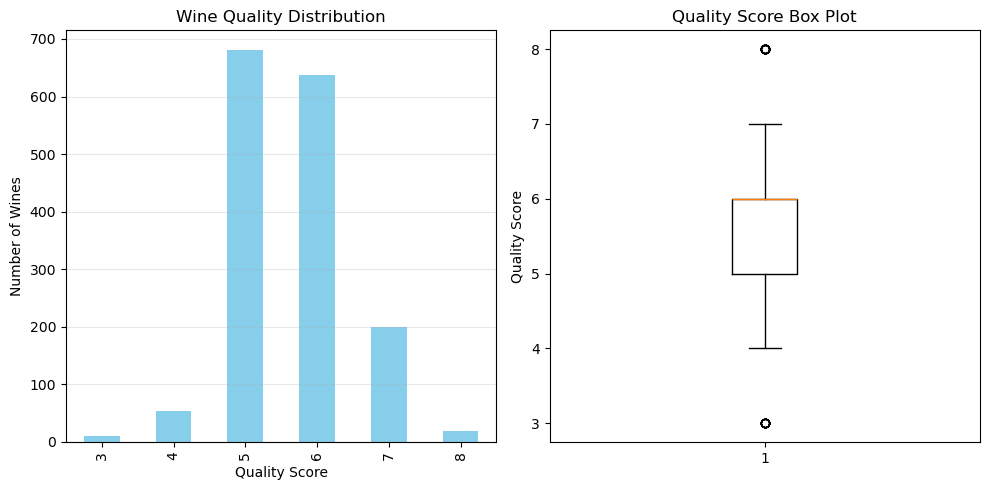


✓ Quality ranges from 3 to 8


In [7]:
# See the distribution of quality scores
print("Quality Score Distribution:")
print(df['quality'].value_counts().sort_index())

print("\n" + "="*50)

# Visualize it
plt.figure(figsize=(10, 5))

# Bar plot
plt.subplot(1, 2, 1)
df['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Number of Wines')
plt.grid(axis='y', alpha=0.3)

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(df['quality'])
plt.title('Quality Score Box Plot')
plt.ylabel('Quality Score')

plt.tight_layout()
plt.show()

print("\n✓ Quality ranges from", df['quality'].min(), "to", df['quality'].max())

Binary Quality Distribution:
quality_binary
1    855
0    744
Name: count, dtype: int64

0 = Bad Wine (quality < 6)
1 = Good Wine (quality >= 6)

Bad wines: 744 (46.5%)
Good wines: 855 (53.5%)


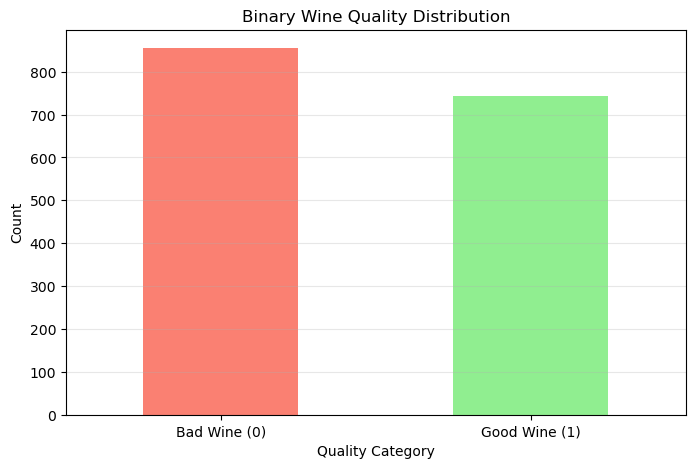


✓ Binary target variable created successfully!


In [8]:
# Create binary target: quality >= 6 is "good" (1), otherwise "bad" (0)
df['quality_binary'] = (df['quality'] >= 6).astype(int)

print("Binary Quality Distribution:")
print("="*50)
print(df['quality_binary'].value_counts())
print("\n0 = Bad Wine (quality < 6)")
print("1 = Good Wine (quality >= 6)")

print("\n" + "="*50)
print(f"Bad wines: {(df['quality_binary']==0).sum()} ({(df['quality_binary']==0).sum()/len(df)*100:.1f}%)")
print(f"Good wines: {(df['quality_binary']==1).sum()} ({(df['quality_binary']==1).sum()/len(df)*100:.1f}%)")

# Visualize
plt.figure(figsize=(8, 5))
df['quality_binary'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Binary Wine Quality Distribution')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.xticks([0, 1], ['Bad Wine (0)', 'Good Wine (1)'], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\n✓ Binary target variable created successfully!")

In [9]:
# Separate features (X) and target (y)
# We drop both 'quality' and 'quality_binary' from features
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

print("Features (X):")
print("="*50)
print(f"Shape: {X.shape}")
print(f"Columns: {X.columns.tolist()}")

print("\n" + "="*50)
print("\nTarget (y):")
print("="*50)
print(f"Shape: {y.shape}")
print(f"Values: {y.unique()}")

print("\n✓ Data separated into features and target successfully!")

Features (X):
Shape: (1599, 11)
Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Target (y):
Shape: (1599,)
Values: [0 1]

✓ Data separated into features and target successfully!


In [11]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # Makes results reproducible
    stratify=y          # Keeps same proportion of good/bad wines in both sets
)

print("Data Split Complete!")
print("="*50)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set:  {X_test.shape[0]} samples")

print("\n" + "="*50)
print("Training set distribution:")
print(y_train.value_counts())
print(f"  Bad: {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"  Good: {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")

print("\nTesting set distribution:")
print(y_test.value_counts())
print(f"  Bad: {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.1f}%)")
print(f"  Good: {(y_test==1).sum()} ({(y_test==1).sum()/len(y_test)*100:.1f}%)")

print("\n✓ Train-test split completed successfully!")

Data Split Complete!
Training set: 1279 samples
Testing set:  320 samples

Training set distribution:
quality_binary
1    684
0    595
Name: count, dtype: int64
  Bad: 595 (46.5%)
  Good: 684 (53.5%)

Testing set distribution:
quality_binary
1    171
0    149
Name: count, dtype: int64
  Bad: 149 (46.6%)
  Good: 171 (53.4%)

✓ Train-test split completed successfully!


In [12]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Complete!")
print("="*50)

# Show before and after for first feature
print("\nExample - 'fixed acidity' column:")
print(f"Before scaling - Mean: {X_train.iloc[:, 0].mean():.2f}, Std: {X_train.iloc[:, 0].std():.2f}")
print(f"After scaling  - Mean: {X_train_scaled[:, 0].mean():.2f}, Std: {X_train_scaled[:, 0].std():.2f}")

print("\n✓ All features now have mean ≈ 0 and std ≈ 1")
print("✓ Training and testing sets both scaled!")

Feature Scaling Complete!

Example - 'fixed acidity' column:
Before scaling - Mean: 8.34, Std: 1.76
After scaling  - Mean: 0.00, Std: 1.00

✓ All features now have mean ≈ 0 and std ≈ 1
✓ Training and testing sets both scaled!


In [13]:
from sklearn.linear_model import LogisticRegression

# Create the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

print("Training Logistic Regression...")
print("="*50)

# Train the model
log_reg.fit(X_train_scaled, y_train)

print("✓ Model trained successfully!")

# Make predictions on test set
y_pred_lr = log_reg.predict(X_test_scaled)

print(f"\n✓ Predictions made on {len(y_pred_lr)} test samples")
print(f"\nFirst 10 predictions: {y_pred_lr[:10]}")
print(f"First 10 actual values: {y_test.values[:10]}")

Training Logistic Regression...
✓ Model trained successfully!

✓ Predictions made on 320 test samples

First 10 predictions: [0 1 0 0 1 1 0 0 0 1]
First 10 actual values: [1 0 0 0 1 1 0 0 1 1]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

print("LOGISTIC REGRESSION PERFORMANCE")
print("="*70)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"\nAccuracy:  {accuracy:.4f}  → {accuracy*100:.2f}% of predictions were correct")
print(f"Precision: {precision:.4f} → When model says 'good wine', it's right {precision*100:.1f}% of the time")
print(f"Recall:    {recall:.4f} → Found {recall*100:.1f}% of all good wines")
print(f"F1-Score:  {f1:.4f} → Balance between precision and recall")

print("\n" + "="*70)
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Bad Wine', 'Good Wine']))

print("✓ Evaluation complete!")

LOGISTIC REGRESSION PERFORMANCE

Accuracy:  0.7406  → 74.06% of predictions were correct
Precision: 0.7683 → When model says 'good wine', it's right 76.8% of the time
Recall:    0.7368 → Found 73.7% of all good wines
F1-Score:  0.7522 → Balance between precision and recall


Detailed Classification Report:
              precision    recall  f1-score   support

    Bad Wine       0.71      0.74      0.73       149
   Good Wine       0.77      0.74      0.75       171

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

✓ Evaluation complete!


Confusion Matrix Breakdown:
True Negatives (correctly identified bad wines):  111
False Positives (bad wines called good):          38
False Negatives (good wines called bad):          45
True Positives (correctly identified good wines): 126


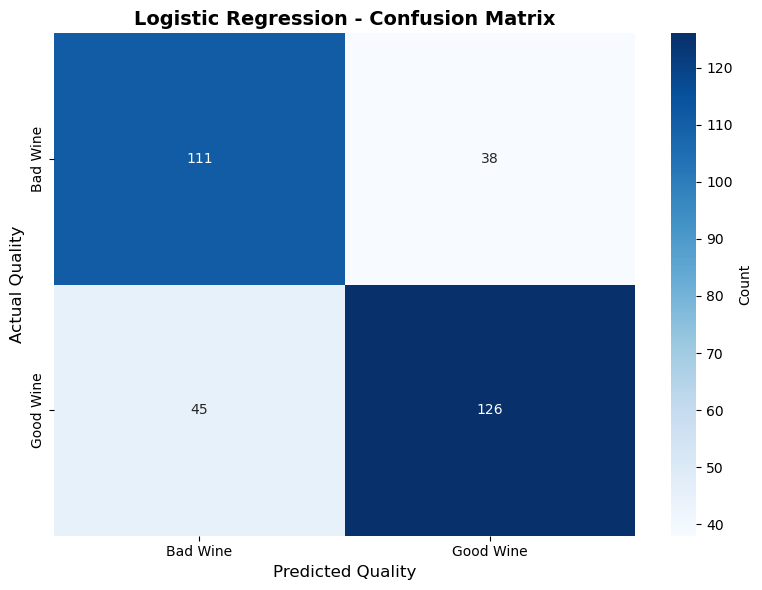


✓ Confusion matrix visualization complete!


In [15]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

print("Confusion Matrix Breakdown:")
print("="*70)
print(f"True Negatives (correctly identified bad wines):  {cm[0,0]}")
print(f"False Positives (bad wines called good):          {cm[0,1]}")
print(f"False Negatives (good wines called bad):          {cm[1,0]}")
print(f"True Positives (correctly identified good wines): {cm[1,1]}")

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'],
            cbar_kws={'label': 'Count'})
plt.title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual Quality', fontsize=12)
plt.xlabel('Predicted Quality', fontsize=12)
plt.tight_layout()
plt.show()

print("\n✓ Confusion matrix visualization complete!")

In [16]:
from sklearn.svm import SVC

# Create the SVM model
svm = SVC(kernel='rbf', random_state=42, C=1.0, gamma='scale')

print("Training Support Vector Machine (SVM)...")
print("="*50)

# Train the model
svm.fit(X_train_scaled, y_train)

print("✓ SVM trained successfully!")

# Make predictions
y_pred_svm = svm.predict(X_test_scaled)

print(f"\n✓ Predictions made on {len(y_pred_svm)} test samples")
print(f"\nFirst 10 predictions: {y_pred_svm[:10]}")
print(f"First 10 actual values: {y_test.values[:10]}")

Training Support Vector Machine (SVM)...
✓ SVM trained successfully!

✓ Predictions made on 320 test samples

First 10 predictions: [0 0 0 0 1 1 0 0 1 1]
First 10 actual values: [1 0 0 0 1 1 0 0 1 1]


SUPPORT VECTOR MACHINE (SVM) PERFORMANCE

Accuracy:  0.7625  → 76.25% of predictions were correct
Precision: 0.8146 → When model says 'good wine', it's right 81.5% of the time
Recall:    0.7193 → Found 71.9% of all good wines
F1-Score:  0.7640 → Balance between precision and recall


Detailed Classification Report:
              precision    recall  f1-score   support

    Bad Wine       0.72      0.81      0.76       149
   Good Wine       0.81      0.72      0.76       171

    accuracy                           0.76       320
   macro avg       0.77      0.77      0.76       320
weighted avg       0.77      0.76      0.76       320



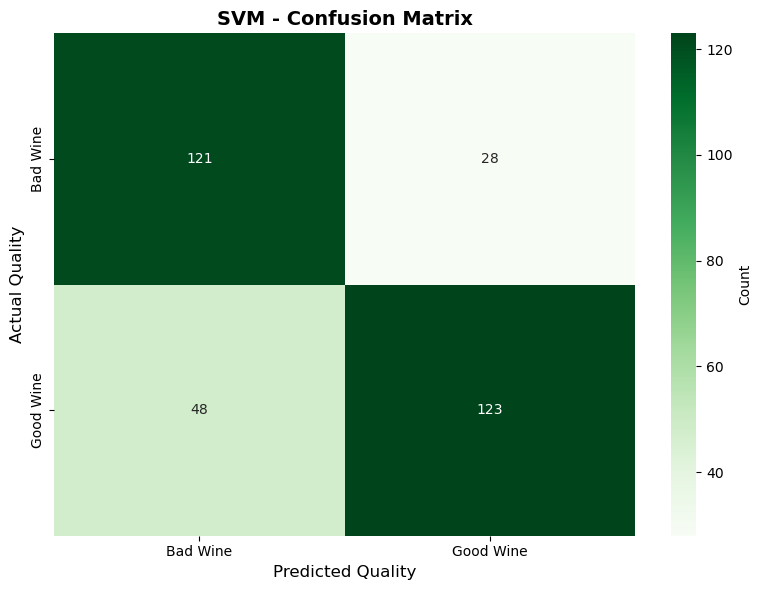

✓ SVM evaluation complete!


In [17]:
print("SUPPORT VECTOR MACHINE (SVM) PERFORMANCE")
print("="*70)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"\nAccuracy:  {accuracy_svm:.4f}  → {accuracy_svm*100:.2f}% of predictions were correct")
print(f"Precision: {precision_svm:.4f} → When model says 'good wine', it's right {precision_svm*100:.1f}% of the time")
print(f"Recall:    {recall_svm:.4f} → Found {recall_svm*100:.1f}% of all good wines")
print(f"F1-Score:  {f1_svm:.4f} → Balance between precision and recall")

print("\n" + "="*70)
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Bad Wine', 'Good Wine']))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'],
            cbar_kws={'label': 'Count'})
plt.title('SVM - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual Quality', fontsize=12)
plt.xlabel('Predicted Quality', fontsize=12)
plt.tight_layout()
plt.show()

print("✓ SVM evaluation complete!")

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

print("Training Random Forest...")
print("="*50)
print("Creating 100 decision trees...")

# Train the model
rf.fit(X_train_scaled, y_train)

print("✓ Random Forest trained successfully!")

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)

print(f"\n✓ Predictions made on {len(y_pred_rf)} test samples")
print(f"\nFirst 10 predictions: {y_pred_rf[:10]}")
print(f"First 10 actual values: {y_test.values[:10]}")

Training Random Forest...
Creating 100 decision trees...
✓ Random Forest trained successfully!

✓ Predictions made on 320 test samples

First 10 predictions: [0 1 0 0 1 1 0 0 0 1]
First 10 actual values: [1 0 0 0 1 1 0 0 1 1]


RANDOM FOREST PERFORMANCE

Accuracy:  0.7969  → 79.69% of predictions were correct
Precision: 0.8193 → When model says 'good wine', it's right 81.9% of the time
Recall:    0.7953 → Found 79.5% of all good wines
F1-Score:  0.8071 → Balance between precision and recall


Detailed Classification Report:
              precision    recall  f1-score   support

    Bad Wine       0.77      0.80      0.79       149
   Good Wine       0.82      0.80      0.81       171

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



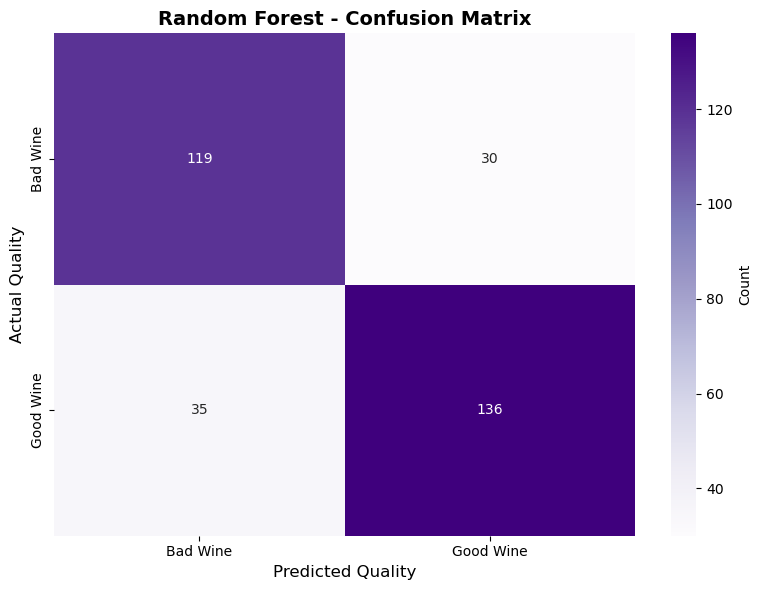

✓ Random Forest evaluation complete!


In [19]:
print("RANDOM FOREST PERFORMANCE")
print("="*70)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"\nAccuracy:  {accuracy_rf:.4f}  → {accuracy_rf*100:.2f}% of predictions were correct")
print(f"Precision: {precision_rf:.4f} → When model says 'good wine', it's right {precision_rf*100:.1f}% of the time")
print(f"Recall:    {recall_rf:.4f} → Found {recall_rf*100:.1f}% of all good wines")
print(f"F1-Score:  {f1_rf:.4f} → Balance between precision and recall")

print("\n" + "="*70)
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Bad Wine', 'Good Wine']))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'],
            cbar_kws={'label': 'Count'})
plt.title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual Quality', fontsize=12)
plt.xlabel('Predicted Quality', fontsize=12)
plt.tight_layout()
plt.show()

print("✓ Random Forest evaluation complete!")

In [20]:
# Create a comparison table for all three models
import pandas as pd

results_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_svm, accuracy_rf],
    'Precision': [precision, precision_svm, precision_rf],
    'Recall': [recall, recall_svm, recall_rf],
    'F1-Score': [f1, f1_svm, f1_rf]
})

print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print(results_comparison.to_string(index=False))
print("="*70)

# Find best model based on F1-Score
best_model_idx = results_comparison['F1-Score'].idxmax()
best_model_name = results_comparison.loc[best_model_idx, 'Model']
best_f1_score = results_comparison.loc[best_model_idx, 'F1-Score']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   F1-Score: {best_f1_score:.4f}")


MODEL COMPARISON SUMMARY
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.740625   0.768293 0.736842  0.752239
                SVM  0.762500   0.814570 0.719298  0.763975
      Random Forest  0.796875   0.819277 0.795322  0.807122

🏆 BEST MODEL: Random Forest
   F1-Score: 0.8071


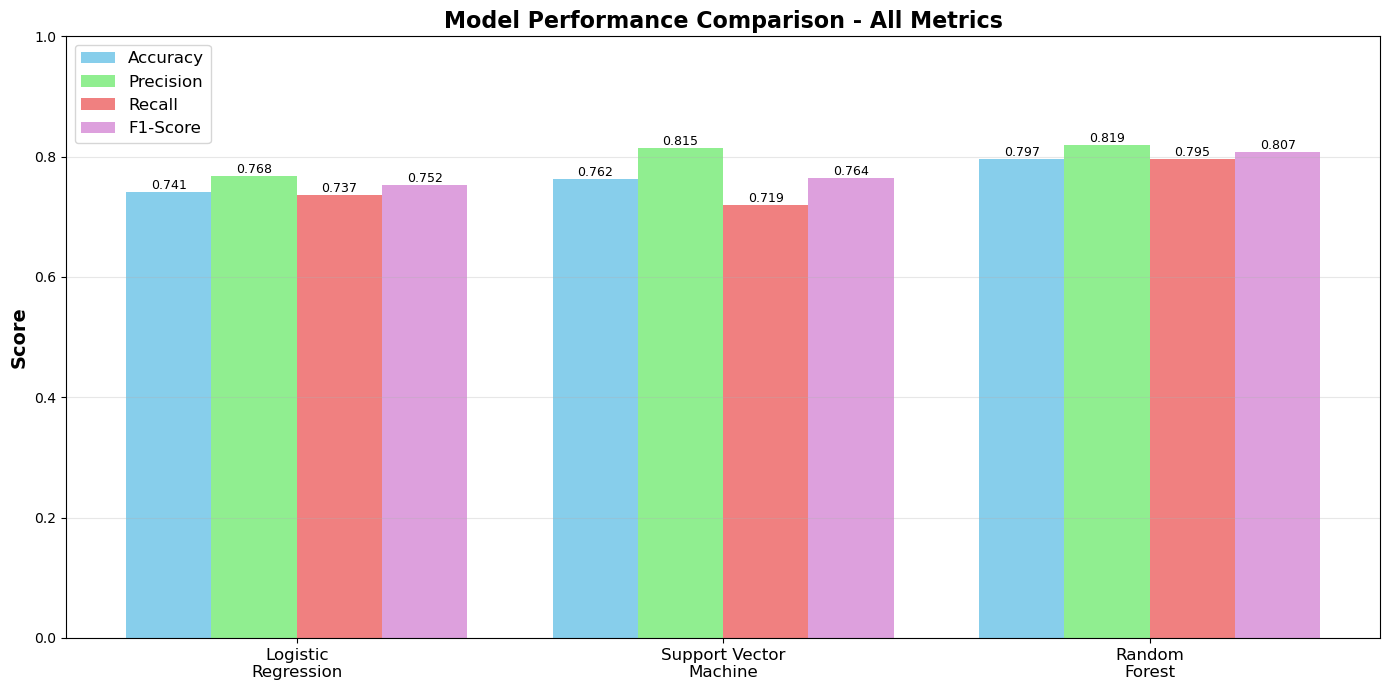

✓ Comparison visualization complete!


In [21]:
# Create visual comparison of all models
models = ['Logistic\nRegression', 'Support Vector\nMachine', 'Random\nForest']
accuracies = [accuracy, accuracy_svm, accuracy_rf]
precisions = [precision, precision_svm, precision_rf]
recalls = [recall, recall_svm, recall_rf]
f1_scores = [f1, f1_svm, f1_rf]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

bars1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x - 0.5*width, precisions, width, label='Precision', color='lightgreen')
bars3 = ax.bar(x + 0.5*width, recalls, width, label='Recall', color='lightcoral')
bars4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1-Score', color='plum')

ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('Model Performance Comparison - All Metrics', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12)
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("✓ Comparison visualization complete!")


FEATURE IMPORTANCE ANALYSIS (Random Forest)
             Feature  Importance
             alcohol    0.199976
           sulphates    0.142437
    volatile acidity    0.112184
total sulfur dioxide    0.099197
             density    0.091480
       fixed acidity    0.069471
           chlorides    0.067434
                  pH    0.058448
         citric acid    0.057330
 free sulfur dioxide    0.051074
      residual sugar    0.050968


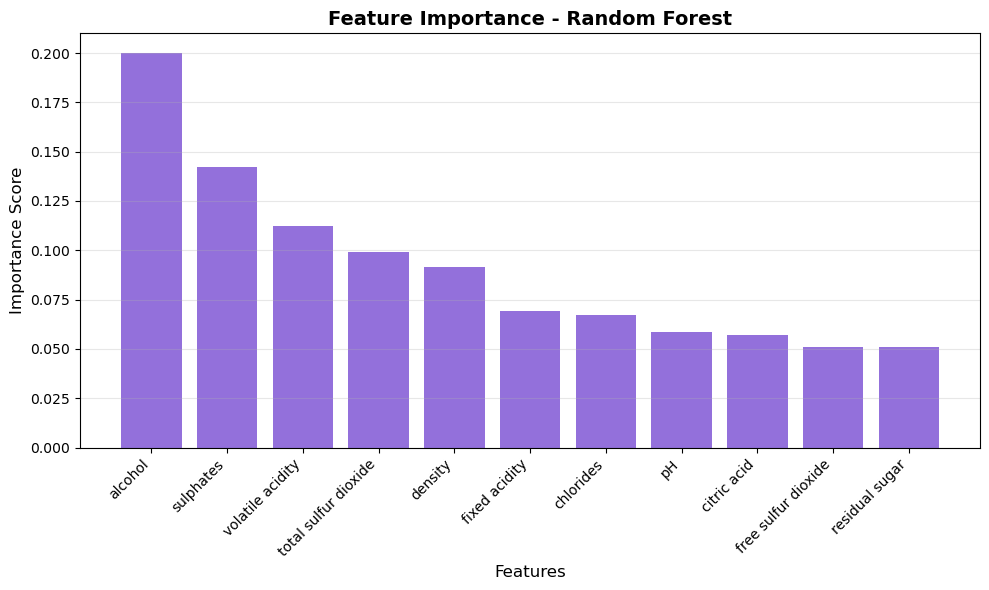


✓ Most important feature: alcohol
   Importance score: 0.2000


In [22]:
# Show which features are most important for prediction
importances = rf.feature_importances_
feature_names = X.columns

# Create dataframe and sort
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nFEATURE IMPORTANCE ANALYSIS (Random Forest)")
print("="*70)
print(feature_importance_df.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[::-1]

plt.bar(range(len(importances)), importances[indices], color='mediumpurple')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✓ Most important feature: {feature_importance_df.iloc[0]['Feature']}")
print(f"   Importance score: {feature_importance_df.iloc[0]['Importance']:.4f}")

In [23]:
print("\n" + "="*70)
print("FINAL ANALYSIS AND KEY FINDINGS")
print("="*70)

print("\n📊 1. BEST OVERALL MODEL:")
print(f"   → {best_model_name}")
print(f"   → Achieved highest F1-Score: {best_f1_score:.4f}")
print(f"   → This model balances precision and recall best")

print("\n📊 2. MODEL COMPARISON INSIGHTS:")
print(f"   → Logistic Regression: Accuracy = {accuracy:.4f} (baseline model)")
print(f"   → SVM: Accuracy = {accuracy_svm:.4f} (handles non-linear patterns)")
print(f"   → Random Forest: Accuracy = {accuracy_rf:.4f} (ensemble approach)")

print("\n📊 3. TRADE-OFFS OBSERVED:")
print("   → Logistic Regression: Fastest, most interpretable, good baseline")
print("   → SVM: Better with complex patterns, slower training")
print("   → Random Forest: Most robust, provides feature importance")

print("\n📊 4. TOP 3 MOST IMPORTANT FEATURES:")
for i in range(min(3, len(feature_importance_df))):
    feat = feature_importance_df.iloc[i]['Feature']
    imp = feature_importance_df.iloc[i]['Importance']
    print(f"   {i+1}. {feat}: {imp:.4f}")

print("\n📊 5. RECOMMENDATIONS:")
print(f"   → For deployment: Use {best_model_name}")
print("   → For interpretability: Use Logistic Regression")
print("   → For feature insights: Use Random Forest")

print("\n" + "="*70)
print("PROJECT COMPLETE! ✓")
print("="*70)


FINAL ANALYSIS AND KEY FINDINGS

📊 1. BEST OVERALL MODEL:
   → Random Forest
   → Achieved highest F1-Score: 0.8071
   → This model balances precision and recall best

📊 2. MODEL COMPARISON INSIGHTS:
   → Logistic Regression: Accuracy = 0.7406 (baseline model)
   → SVM: Accuracy = 0.7625 (handles non-linear patterns)
   → Random Forest: Accuracy = 0.7969 (ensemble approach)

📊 3. TRADE-OFFS OBSERVED:
   → Logistic Regression: Fastest, most interpretable, good baseline
   → SVM: Better with complex patterns, slower training
   → Random Forest: Most robust, provides feature importance

📊 4. TOP 3 MOST IMPORTANT FEATURES:
   1. alcohol: 0.2000
   2. sulphates: 0.1424
   3. volatile acidity: 0.1122

📊 5. RECOMMENDATIONS:
   → For deployment: Use Random Forest
   → For interpretability: Use Logistic Regression
   → For feature insights: Use Random Forest

PROJECT COMPLETE! ✓


In [24]:
# Save comparison results to CSV
results_comparison.to_csv('model_comparison_results.csv', index=False)
print("✓ Results saved to 'model_comparison_results.csv'")

# Save feature importance
feature_importance_df.to_csv('feature_importance.csv', index=False)
print("✓ Feature importance saved to 'feature_importance.csv'")

print("\n✓ All results saved successfully!")
print("✓ You can find these files in your project folder:")
print("   C:\\Users\\GURU IS GREAT\\Desktop\\wine-quality-project\\")

✓ Results saved to 'model_comparison_results.csv'
✓ Feature importance saved to 'feature_importance.csv'

✓ All results saved successfully!
✓ You can find these files in your project folder:
   C:\Users\GURU IS GREAT\Desktop\wine-quality-project\
